<h1 style='background:#483D8B; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:white'><center>Fetal Health Classification</center></h1>

<h2 style='border:0; color:black'><center>About the data (Description of attributes)</center></h2>

**This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes: "Normal", "Suspect" & "Pathological". Dataset having the following features:**  
    
* **baseline value:** Baseline Fetal Heart Rate (FHR) (beats per minute)   
* **accelerations:** Number of accelerations per second
* **fetal_movement:** Number of fetal movements per second    
* **uterine_contractions:** Number of uterine contractions per second
* **light_decelerations:** Number of light decelerations (LDs) per second
* **severe_decelerations:** Number of severe decelerations (SDs) per second
* **prolongued_decelerations:** Number of prolonged decelerations (PDs) per second
* **abnormal_short_term_variability:** Percentage of time with abnormal short term variability
* **mean_value_of_short_term_variability:** Mean value of short term variability
* **percentage_of_time_with_abnormal_long_term_variability:** Percentage of time with abnormal long term variability
* **mean_value_of_long_term_variability:** Mean value of long term variability
* **histogram_width:** Width of histogram made using all values from a record 
* **histogram_min:** Histogram minimum value 
* **histogram_max:** Histogram maximum value 
* **histogram_number_of_peaks:** Number of peaks in the exam histogram 
* **histogram_number_of_zeroes:** Number of zeros in the exam histogram 
* **histogram_mode:** Histogram mode
* **histogram_mean:** Histogram mean
* **histogram_median:** Histogram median
* **histogram_variance:** Histogram variance
* **histogram_tendency:** Histogram tendency
* **fetal_health:** Encoded as 1-Normal; 2-Suspect; 3-Pathological. <mark>It is our very target column in the dataset.</mark>

### **<span style="color:#483D8B;">important libraries</span>**

In [2]:
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_recall_fscore_support,roc_auc_score,classification_report 

### **<span style="color:#483D8B;">import data</span>**

In [3]:
data = pd.read_csv('./IDS_Assignment/fetal_health.csv')


# **<span style="color:#483D8B;">EDA</span>**

In [7]:
data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [8]:
data.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [9]:
df_nunique = pd.DataFrame([[i, data[i].nunique()] for i in data.columns],columns=['column','nunique']).set_index('column')
df_nunique

nunique
column                                                     
baseline value                                           48
accelerations                                            20
fetal_movement                                          102
uterine_contractions                                     16
light_decelerations                                      16
severe_decelerations                                      2
prolongued_decelerations                                  6
abnormal_short_term_variability                          75
mean_value_of_short_term_variability                     57
percentage_of_time_with_abnormal_long_term_vari...       87
mean_value_of_long_term_variability                     249
histogram_width                                         154
histogram_min                                           109
histogram_max                                            86
histogram_number_of_peaks                                18
histogram_number_of_zeroes                                9
histogram_mode                                           88
histogram_mean                                          103
histogram_median                                         95
histogram_variance                                      133
histogram_tendency                                        3
fetal_health                                              3

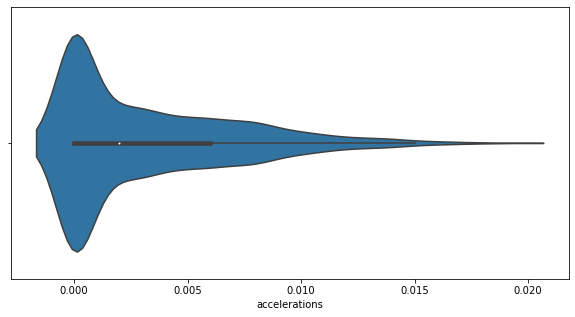

In [10]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(data['accelerations'])
plt.show()

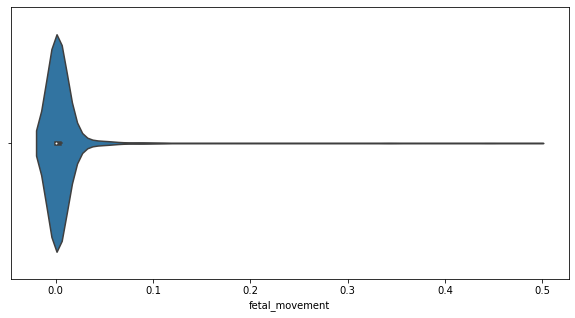

In [11]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(data['fetal_movement'])
plt.show()

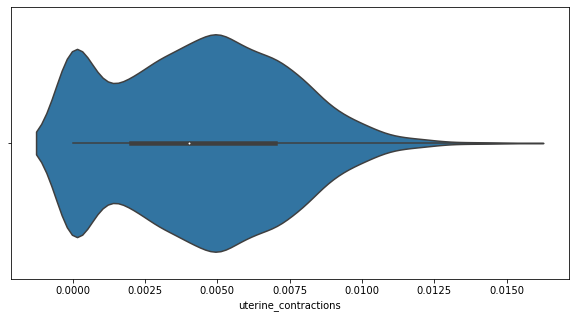

In [12]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(data['uterine_contractions'])
plt.show()

In [13]:
data.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

**Minor Observation:** Attributes such as severe_decelerations,prolongues_decelerations are more or less constant with few variation. We may remove those. will taken care of these in Dimensionality Reduction.

In [14]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

There is no null value let's proceed further to check class blancing

Text(0.5, 1.0, 'Number of samples of each class:')

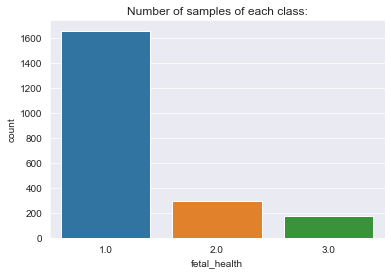

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
sns.countplot(data=data,x='fetal_health')
plt.title("Number of samples of each class:")

Observation: An highly Imbalanced Dataset. Which is obvious as Normal would be dominant.

Solution: Oversampling of the minority classes. To make better predictions.(Will perform later in the notebook)

In [16]:
data1 = data.copy()
data1.fetal_health = data1.fetal_health.astype('int')
data1.fetal_health = data1.fetal_health.replace([1,2,3],['Normal','Suspect','Pathological'])

([<matplotlib.patches.Wedge at 0x7fce0ee52c40>,
 [Text(-0.8441562311892146, 0.7052660897451555, 'Normal'),
  Text(0.6344062353380877, -0.8986260226390926, 'Suspect'),
  Text(1.0630076905865578, -0.28286860863983, 'Pathological')],
 [Text(-0.4604488533759351, 0.38469059440644837, '78%'),
  Text(0.34603976472986603, -0.4901596487122323, '14%'),
  Text(0.5798223766835768, -0.15429196834899814, '8%')])

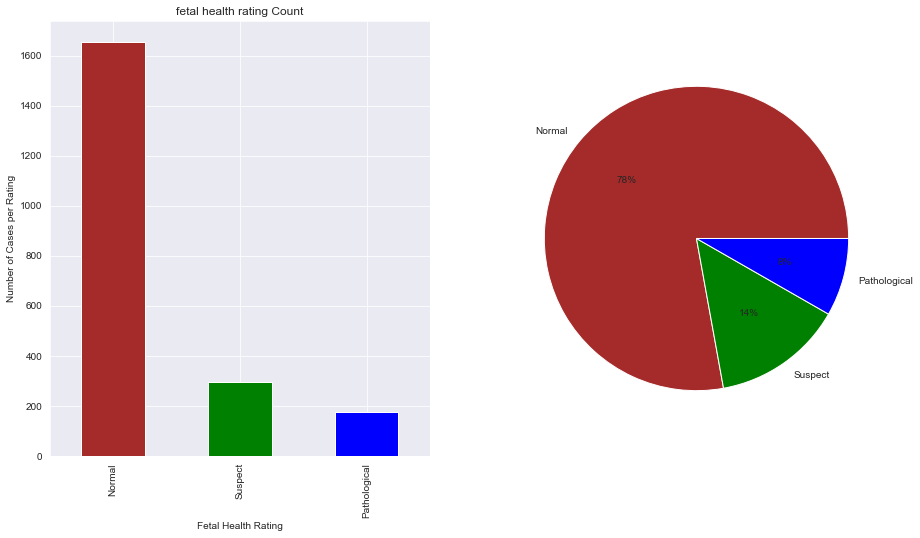

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(121)
data1.fetal_health.value_counts().plot(kind='bar',figsize=(15,8),color = ['brown','g','b'])
plt.title('fetal health rating Count')
plt.xlabel('Fetal Health Rating')
plt.ylabel('Number of Cases per Rating')

plt.subplot(122)
plt.pie(data1.fetal_health.value_counts(),labels=[
    'Normal', 'Suspect', 'Pathological'], colors = ['brown', 'g', 'b'], autopct='%1.0f%%')

### **<span style="color:#483D8B;">Define Function</span>**

In [18]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [19]:
from sklearn import tree
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(80,80))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['Normal', "Suspect",'Pathological'],
                       filled=True,fontsize=14)

### **<span style="color:#483D8B;">Train/Test Split</span>**

In [20]:
X = data.drop('fetal_health',axis=1)
y = data.fetal_health
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

<AxesSubplot:>

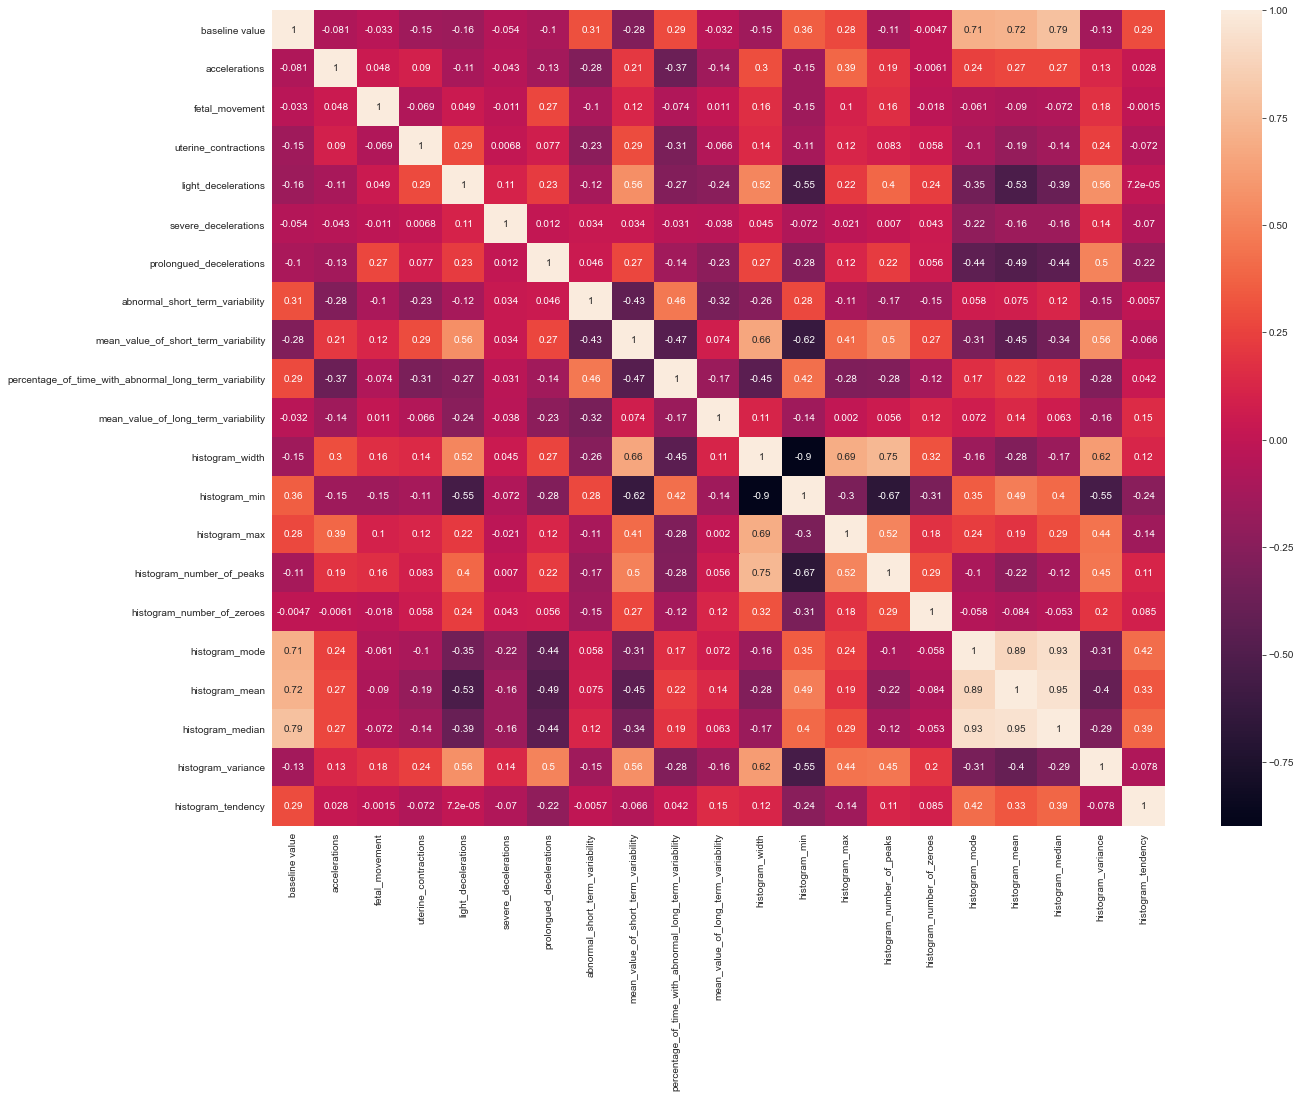

In [21]:
corr=X.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

**<span style="color:#483D8B;">Observations: > histogram mean,median,mode have high correlations.The distribution may towards normal.</span>**

In [22]:
grouped=data.groupby(by='fetal_health').mean()
grouped

baseline value  accelerations  fetal_movement  \
fetal_health                                                  
1.0               131.981873       0.003992        0.007963   
2.0               141.684746       0.000275        0.008332   
3.0               131.687500       0.000392        0.025676   

              uterine_contractions  light_decelerations  severe_decelerations  \
fetal_health                                                                    
1.0                       0.004781             0.001941          6.042296e-07   
2.0                       0.002390             0.000536          0.000000e+00   
3.0                       0.003784             0.003670          3.409091e-05   

              prolongued_decelerations  abnormal_short_term_variability  \
fetal_health                                                              
1.0                           0.000051                        42.465861   
2.0                           0.000095                        61.901695   
3.0                           0.001273                        64.539773   

              mean_value_of_short_term_variability  \
fetal_health                                         
1.0                                       1.430634   
2.0                                       0.638983   
3.0                                       1.575568   

              percentage_of_time_with_abnormal_long_term_variability  ...  \
fetal_health                                                          ...   
1.0                                                    5.044713       ...   
2.0                                                   29.030508       ...   
3.0                                                   22.846591       ...   

              histogram_width  histogram_min  histogram_max  \
fetal_health                                                  
1.0                 73.400000      91.085801     164.485801   
2.0                 49.159322     113.294915     162.454237   
3.0                 78.346591      83.982955     162.329545   

              histogram_number_of_peaks  histogram_number_of_zeroes  \
fetal_health                                                          
1.0                            4.163142                    0.335347   
2.0                            3.311864                    0.244068   
3.0                            4.443182                    0.346591   

              histogram_mode  histogram_mean  histogram_median  \
fetal_health                                                     
1.0               138.258610      135.102115        138.459819   
2.0               146.555932      144.759322        147.071186   
3.0               114.607955      112.977273        119.562500   

              histogram_variance  histogram_tendency  
fetal_health                                          
1.0                    17.479758            0.341994  
2.0                     7.213559            0.433898  
3.0                    50.732955           -0.073864  

[3 rows x 21 columns]

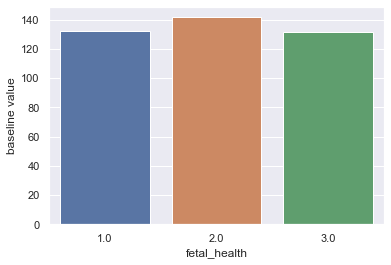

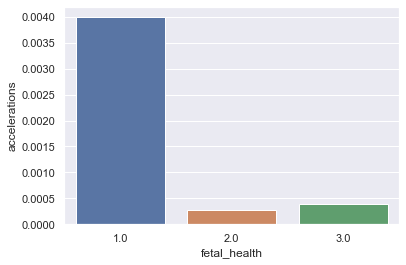

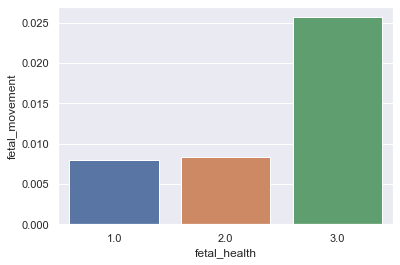

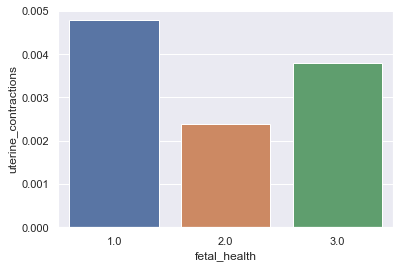

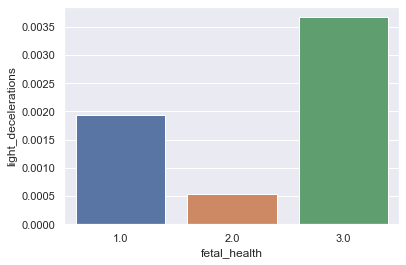

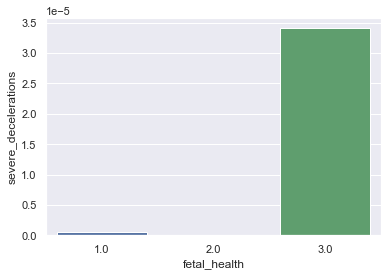

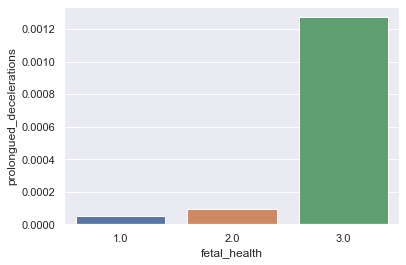

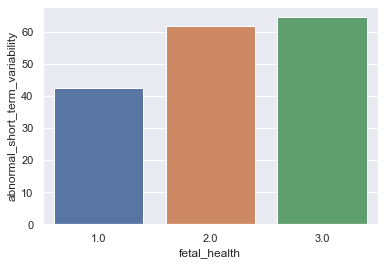

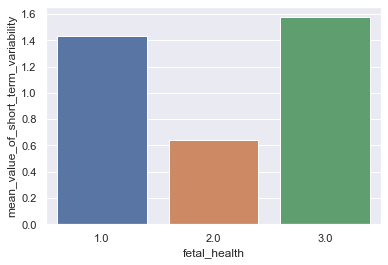

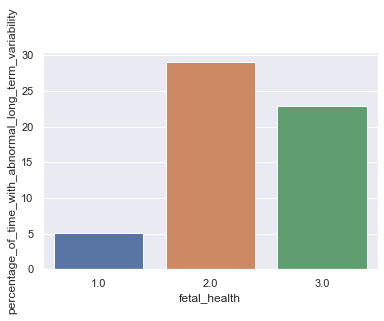

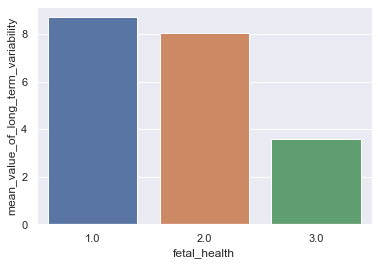

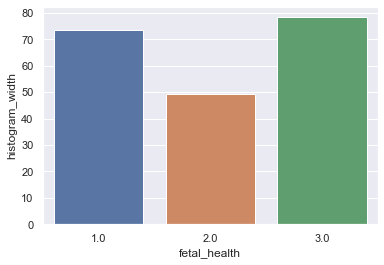

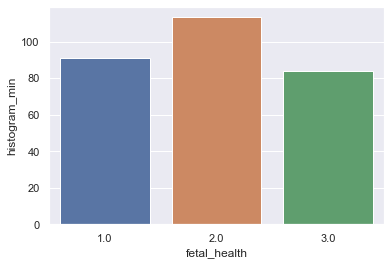

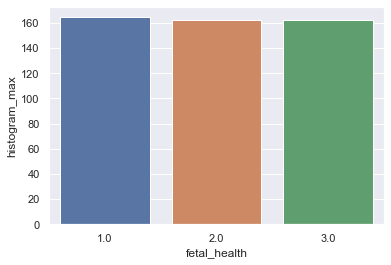

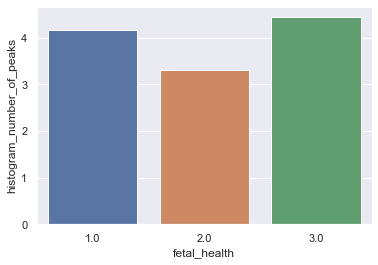

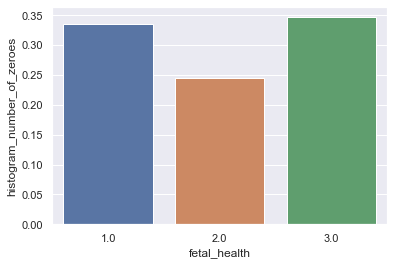

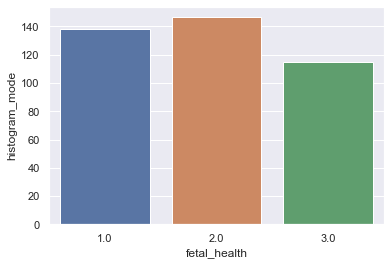

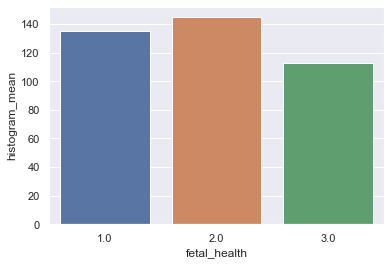

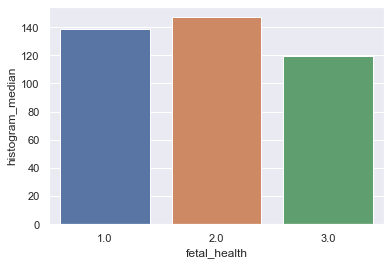

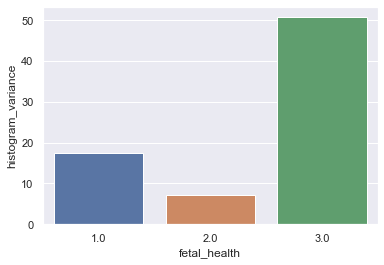

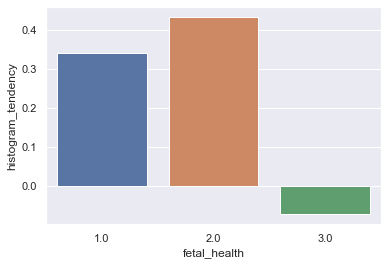

In [23]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
for index,i in enumerate(grouped.columns,start=1):
    plt.figure(figsize=(6,4))
    sns.barplot(data=grouped,x=grouped.index,y=grouped[i])
    plt.show()

### **<span style="color:#483D8B;">Oversampling of Minority Class</span>**

In [24]:
!pip install imblearn
!pip install scipy --upgrade
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)

In [25]:
y_over

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4960    3.0
4961    3.0
4962    3.0
4963    3.0
4964    3.0
Name: fetal_health, Length: 4965, dtype: float64

In [26]:
X_over

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
4960           123.0          0.000           0.000                 0.000   
4961           123.0          0.000           0.002                 0.000   
4962           121.0          0.000           0.002                 0.002   
4963           133.0          0.000           0.000                 0.004   
4964           131.0          0.000           0.003                 0.003   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                     0.000   
1                   0.003                   0.0                     0.000   
2                   0.003                   0.0                     0.000   
3                   0.003                   0.0                     0.000   
4                   0.000                   0.0                     0.000   
...                   ...                   ...                       ...   
4960                0.000                   0.0                     0.000   
4961                0.000                   0.0                     0.000   
4962                0.015                   0.0                     0.000   
4963                0.004                   0.0                     0.004   
4964                0.008                   0.0                     0.003   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
4960                             74.0                                   0.3   
4961                             70.0                                   0.3   
4962                             61.0                                   2.0   
4963                             63.0                                   1.9   
4964                             67.0                                   1.7   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
4960                                               90.0       ...   
4961                                               54.0       ...   
4962                                                0.0       ...   
4963                                                0.0       ...   
4964                                                0.0       ...   

      histogram_width  histogram_min  histogram_max  \
0                64.0           62.0          126.0   
1               130.0           68.0          198.0   
2               130.0           68.0          198.0   
3               117.0           53.0          170.0   
4               117.0           53.0          170.0   
...               ...            ...            

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

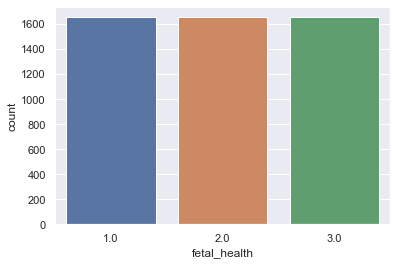

In [27]:
sns.countplot(data=pd.DataFrame(y_over),x='fetal_health')

In [28]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [29]:
col=['baseline value', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations','abnormal_short_term_variability']
X_over=X_over[col]

***Now All the classes have same number of samples! Lets do some Dimensionality reduction to get more insights***

### **<span style="color:#483D8B;">Dimensionality Reduction and visualization</span>**

**<span style="color:#483D8B;">Scaling Data</span>**

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_over)

In [31]:
X_scaled=pd.DataFrame(X_scaled,columns=X_over.columns)
X_scaled.head()

baseline value  fetal_movement  uterine_contractions  light_decelerations  \
0       -1.495821       -0.236142             -1.138935            -0.625023   
1       -0.306288       -0.236142              0.724674             0.278658   
2       -0.207160       -0.236142              1.345878             0.278658   
3       -0.108032       -0.236142              1.345878             0.278658   
4       -0.306288       -0.236142              1.345878            -0.625023   

   severe_decelerations  prolongued_decelerations  \
0             -0.097759                 -0.473114   
1             -0.097759                 -0.473114   
2             -0.097759                 -0.473114   
3             -0.097759                 -0.473114   
4             -0.097759                 -0.473114   

   abnormal_short_term_variability  
0                         0.980091  
1                        -2.307176  
2                        -2.365877  
3                        -2.365877  
4                        -2.365877

In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3) #getting 3 components with highest variance
X_pca=pca.fit_transform(X_scaled)
X_pca=pd.DataFrame(X_pca)
X_pca.head()

0         1         2
0 -0.768922  0.023707  0.879150
1  1.174103 -0.645235 -1.730220
2  1.437712 -0.823380 -1.997920
3  1.393868 -0.817731 -2.012842
4  1.013673 -0.633614 -2.187387

In [33]:
!pip3 install plotly
import plotly.express as px
fig = px.scatter_3d(X_pca, x=0, y=1, z=2,
              color=y_over, size_max=10)
fig.show()

Not much information by checking this graph!

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95) #0.95 here refers that the total variance explained by the components must be atleast 95%
X_pca_final=pca.fit_transform(X_scaled)
X_pca_final=pd.DataFrame(X_pca_final)
X_pca_final.head()

0         1         2         3         4         5         6
0 -0.768922  0.023707  0.879150  0.108834 -1.894776  0.050763  0.453583
1  1.174103 -0.645235 -1.730220  1.049922 -0.053784  0.029619 -0.643598
2  1.437712 -0.823380 -1.997920  0.937408  0.266148  0.148538 -0.331958
3  1.393868 -0.817731 -2.012842  0.925044  0.348180  0.138550 -0.357798
4  1.013673 -0.633614 -2.187387  1.166317  0.079894  0.775527 -0.024481

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca_final,y_over,random_state=42,stratify=y_over)

# **<span style="color:#483D8B;">Modeling </span>**

In [36]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

### **<span style="color:#483D8B;">Hyper-parameter tuning  </span>**

In [37]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [38]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [39]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 172 ms, sys: 79 ms, total: 251 ms
Wall time: 1.91 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [40]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.005416      0.000035         0.001616        0.000016   
1       0.005579      0.000814         0.001735        0.000237   
2       0.004880      0.000154         0.001663        0.000087   
3       0.005007      0.000234         0.001867        0.000309   
4       0.004874      0.000083         0.001685        0.000104   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.709989   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.709989   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.709989   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.709989   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.709989   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.707841           0.687433           0.668817          0.69352   
1           0.707841           0.687433           0.668817          0.69352   
2           0.707841           0.687433           0.668817          0.69352   
3           0.707841           0.687433           0.668817          0.69352   
4           0.707841           0.687433           0.668817          0.69352   

   std_test_score  rank_test_score  
0         0.01676               41  
1         0.01676               41  
2         0.01676               41  
3         0.01676               41  
4         0.01676               41

In [41]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
45       0.013640      0.000543         0.001566        0.000017   
40       0.012911      0.000168         0.001830        0.000140   
20       0.010217      0.000133         0.001631        0.000045   
46       0.012996      0.000455         0.001874        0.000151   
15       0.010259      0.000346         0.001635        0.000072   

   param_criterion param_max_depth param_min_samples_leaf  \
45         entropy              20                      5   
40         entropy              10                      5   
20            gini              20                      5   
46         entropy              20                     10   
15            gini              10                      5   

                                               params  split0_test_score  \
45  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.918367   
40  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.894737   
20  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.912997   
46  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.888292   
15  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.899033   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
45           0.925886           0.916219           0.920430         0.920226   
40           0.905478           0.908700           0.902151         0.902766   
20           0.912997           0.896885           0.878495         0.900343   
46           0.896885           0.899033           0.883871         0.892020   
15           0.902256           0.892589           0.874194         0.892018   

    std_test_score  rank_test_score  
45        0.003591                1  
40        0.005182                2  
20        0.014226                3  
46        0.006188                4  
15        0.010863                5

In [42]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [43]:
dt_best = grid_search.best_estimator_

In [44]:
evaluate_model(dt_best)

Train Accuracy : 0.9642761214074671
Train Confusion Matrix:
[[1179   44   18]
 [  39 1174   28]
 [   0    4 1237]]
--------------------------------------------------
Test Accuracy : 0.9307568438003221
Test Confusion Matrix:
[[364  40  10]
 [ 20 379  15]
 [  0   1 413]]


a. What is the overall accuracy of the decision tree model?
Training accuracy is 96.4 % where as test accuracy is 93.2%

b. Write the confusion matrix. Discuss the implications of Type-I error and Type-II error in this example.
Confusion Matrix is above.
Type I and Type II errors are very common in machine learning Type I error occurs when the Null Hypothesis (H0) 
is mistakenly rejected. This is also referred to as the False Positive Error. 
Type II error occurs when a Null Hypothesis that is actually false is accepted. 
This is also referred to as the False Negative Error.

Apart from Diagonal Value in above confusion Matrix are type1 & type 2 error value.

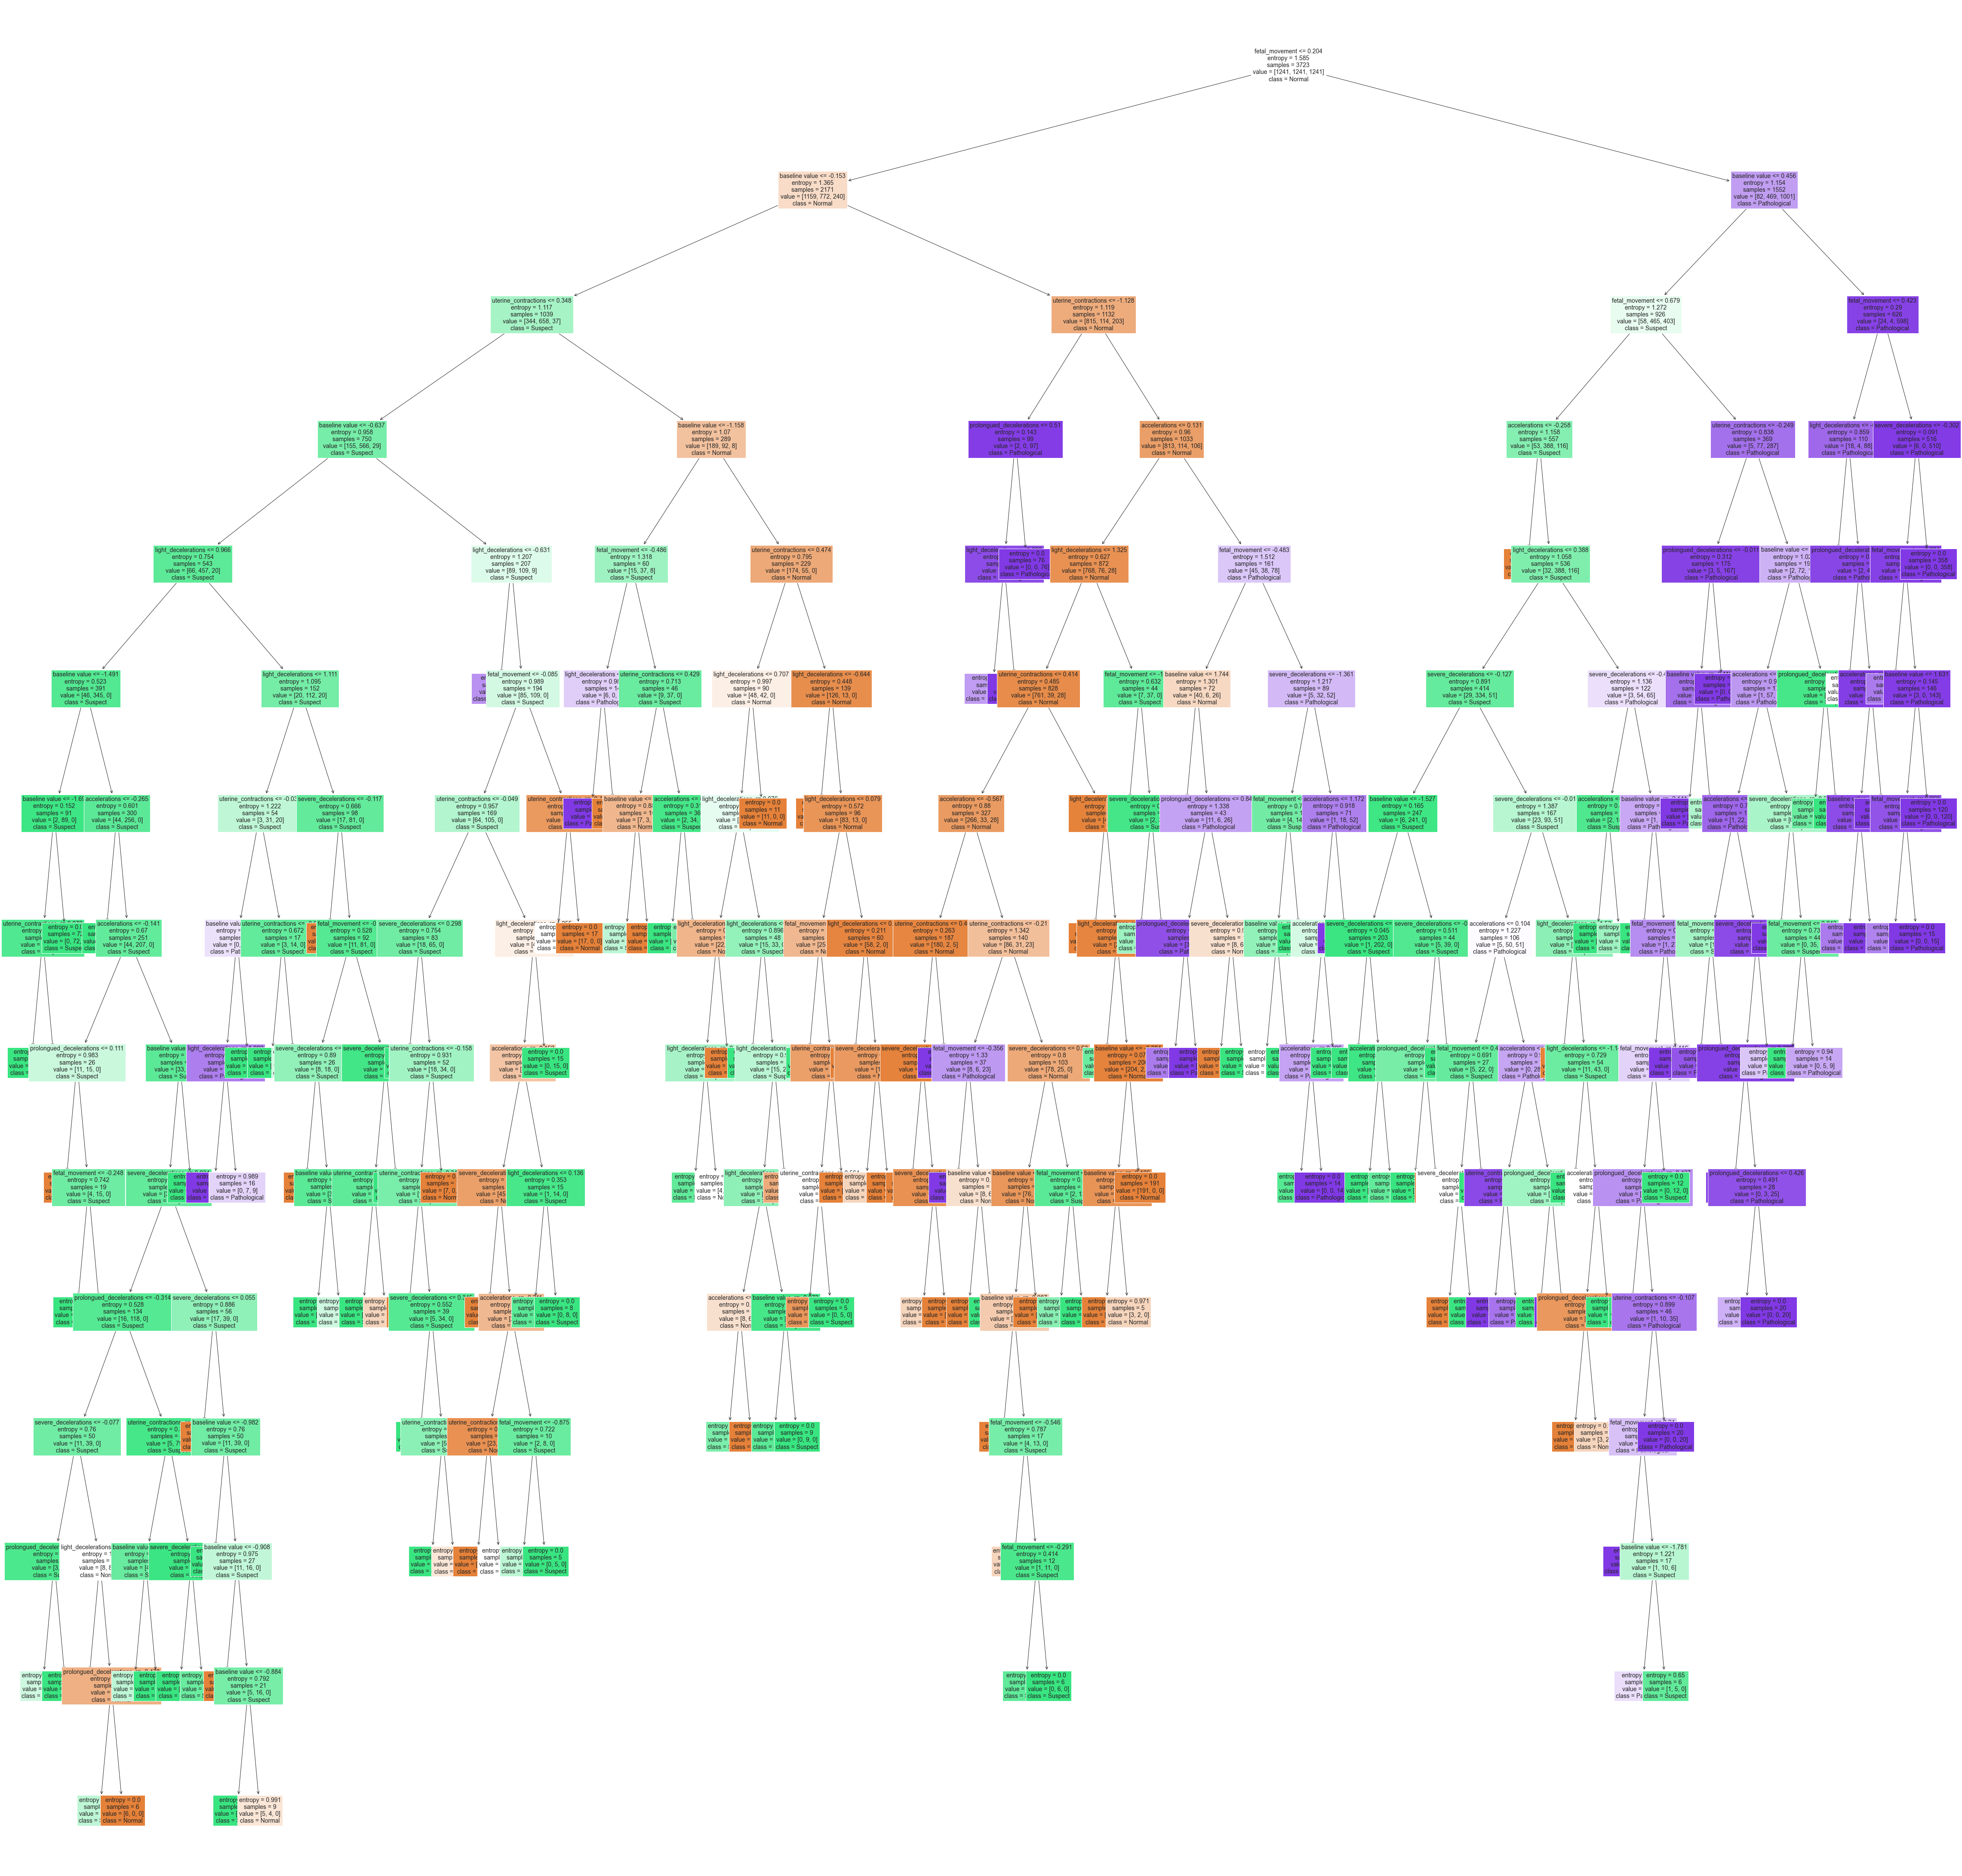

In [45]:
get_dt_graph(dt_best)

Q. What are the Precision, Recall, F1 score for the three classes, based on the confusion matrix?

In [46]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.95      0.88      0.91       414
         2.0       0.90      0.92      0.91       414
         3.0       0.94      1.00      0.97       414

    accuracy                           0.93      1242
   macro avg       0.93      0.93      0.93      1242
weighted avg       0.93      0.93      0.93      1242



### **<span style="color:#483D8B;">The ROC CURVE  </span>**

Plot the ROC curves for the three classes.

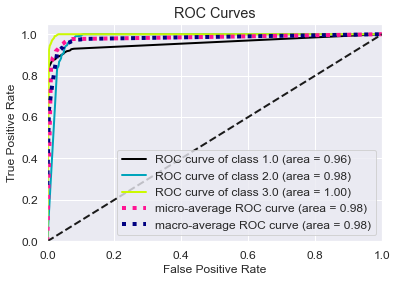

In [48]:
# The ROC AUC curve
!pip3 install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
predicted_probas = dt_best.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

So Finally we have :</br> DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5, random_state=42) with above Decision Tree Classifier we got 93% test accuracy , with more than .90 f1 score above model have auc value above 0.96 . finally from above score we can say that we have good model for prediction.